## Simulate a biased coin

Consider the game we discussed in lecture in which Helena flips a coin.  Helena wins $\$ 1$ if the coin comes up heads and loses $\$ 1$ if the coin comes up tails.

- Suppose you have a sequence $o_1, o_2, \dots, o_n$ of real numbers corresponding to, say, measured values of some observable quantity $O$.  The $k^\mathrm{th}$ **running average** of this sequence is defined as follows:
\begin{align}
    \langle O \rangle_k = \frac{o_1 + o_2 + \cdots + o_k}{k}.
\end{align}
Show (type out your proof in LaTeX) that the $k^\mathrm{th}$ running averages satisfy the following identity:
\begin{align}
    \langle O\rangle_{k+1} = \langle O\rangle_k + \frac{1}{k+1}(o_{k+1} - \langle O\rangle_k).
\end{align}
This is a useful identity because it means that if you're generating the sequence of $o_k$'s one after the other in, say, a loop, computing the running average on each iteration doesn't require summing up all of the previous values and dividing by the total number of values every single time -- you can simply update the prior running average by adding a change term that depends on the next value in the sequence and the current running average.
- Write a Python function called 

        weighted_coin 

  whose inputs are:
  - `beta`: a float that gives the probability of the coin landing heads (it's "bias" toward heads if you will)
  - `n`: a positive integer representing the number of flips of the coin
  
  and whose output is Helena's average earnings per flip in dollars based on a Metropolis MCMC simulation of `n` flips of the coin as well as a plot that tracks the average earnings per flip during the simulation.  This plot should have the average earnings per flip on the vertical axis and the simulation "time" on the horizontal axis.  You may choose to include an additional argument in your function that allows you to only keep track of and plot the running average after having waited a specified number of iterations each time you sample the running average so that the code will run faster.  For example, if you want to flip the coin 10 million times, then you probably don't need to be plotting the running average *every* flip but instead maybe every 10 thousand flips (or some reasonable number of your choosing). 
- Write a Python function 

        average_earnings_per_flip 

  whose input is `beta`, a float that gives the probability of a coin landing heads, and whose output is the average earnings per flip in dollars calculated exactly (following the method a human might use to compute the average earnings per flip on a piece of paper).
- Generate a grid of two plots: one that gives the theoretical average earnings per flip as a function of `beta` on the interval $[0, 1]$ and compares it to the average earnings per flip computed via Metropolis MCMC simulation of 1 thousand flips for 20 equally-spaced values of `beta` on the interval $[0, 1]$, and one that's the same except thatt uses 1 million flips for each run of the simulation.


## Simulate a weighted die

Imagine that you are playing a game with your friend in which you roll a 6-sided die.  The way the game works is that every time the die lands on side 1 or side 2, you win one dollar, and every time the die lands on side 3, 4, 5, or 6, your friend wins one dollar.  You want to win the game at all costs, so naturally you decide to cheat and use a weighted die that's preferentially weighted so that sides 1 and 2 are each three times more likely to land face up than sides 3, 4, 5, and 6.

- Write a function

        weighted_die

  whose input is
  - `n`: the number of times the die is rolled
  that runs a Metropolis MCMC simulation and outputs the average earnings per roll after rolling the die `n` times. 
- Deteremine roughly how many steps you need before the simulation's average earnings seems to converge to the nearest $\$0.01$.  In other words, play around with the simulation to determine how many steps in the simulation you need so that when you run the simulation with that many steps, the result is pretty much always the same value to within one cent.
- Figure out the expected value of your earnings analytically and compare this to what your simulation produces as a sanity check.

Proof

Base case: $\langle O_1 \rangle = o_1$. (Obviously, the average of one element is itself.)

Induction step: Suppose $\langle O\rangle_{k+1} = \langle O\rangle_k + \frac{1}{k+1}(o_{k+1} - \langle O\rangle_k)$ holds for the $k th$ running element. 

We want to show that this relation also holds for $k+1 th$ element, which means to show $ \langle O_{k+2} \rangle = \langle O\rangle_{k+1} + \frac{1}{k+2}(o_{k+2} - \langle O\rangle_{k+1}) $.
$$
\begin{align*}
RHS &= \frac{o_1 + ... + o_{k+1}}{k+1} + \frac{1}{k+2}(o_{k+2} - \frac{o_1 + ... + o_{k+1}}{k+1}) \\
&= \frac{(o_1 + ... + o_{k+1})(k+2) + o_{k+2}(k+1) - (o_1 + ... + o_{k+1})}{(k+1)(k+2)} \\
&= \frac{(o_1 + ... + o_{k+1})(k+1) + o_{k+2}(k+1)}{(k+1)(k+2)} \\
&= \frac{(o_1 + ... + o_{k+1}) + o_{k+2}}{k+2} \\
&= \langle O_{k+2} \rangle
\end{align*}
$$
The relation holds for the $k+1 th$ element.

Hence proved.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
plt.ioff()
import scipy as scpy
import random as rand

In [ ]:
def weighted_coin(beta, n):
  """ Does MCMC simulation for the flipping of a biased coin
  Args:
      beta: a float that gives the probability of the coin landing heads
      n: a positive intiger representing the number of flips of the coin

  Returns:
          avg_earning: a float that gives the average earning per flip based on MCMC simulation
          fig: a plot that tracks the average earnings per flip during the simulation
  """
  # probability
  prob = [1 - beta, beta]
  earn = [-1, 1]

  # initial proposal
  avg_earning = current = np.random.choice([0, 1]) # 0 stands for tail. 1 stands for head.
  avg_earning_arr = np.zeros(int(n/10))

  # MCMC steps
  # [0,0.5] represents tail. [0.5,1] represents head.
  for i in range(1,n):

    # propose a state
    propose = np.random.choice([0, 1])

    # decide whether to accept the change or not
    p_accept = min(1, prob[propose]/prob[current])
    
    if np.random.uniform(0,1) < p_accept:
      current = propose
    
    # update average earnings per flip
    avg_earning = avg_earning + (1/(i+1)) * (earn[current] - avg_earning)

    # record the average earnings every 10 steps
    if i%10 == 0:
      avg_earning_arr[int(i/10)] = avg_earning
  
  # plot
  fig = plt.plot(np.linspace(0,n,len(avg_earning_arr)),avg_earning_arr)
  #fig = plt.figure();
  #ax1 = fig.add_subplot(1,1,1);
  #ax1.plot(np.linspace(0,n-1,n),avg_earning)
  #ax1.ioff()

  return avg_earning, fig


In [ ]:
beta = 0.6
n = 100000
weighted_coin(beta, n)[0]

0.19637000000000324

In [ ]:
def average_earnings_per_flip(beta):
  ''' Computes the exact value of the average earnings per flip in dollars
  
  Args:
      beta: A float reperesetning the probability of a coin landing heads
  
  Returns: 
          beta * 1 + (1 - beta) * (-1): A float that gives the exact value of the average earnings per flip in dollars
  '''
  return beta * 1 + (1 - beta) * (-1)

In [ ]:
beta = np.linspace(0,1,20)

avg_mc_1 = np.zeros(20)
avg_mc_2 = np.zeros(20)
avg_exact = np.zeros(20)

for i in range(20):
  avg_mc_1[i] = weighted_coin(beta[i],1000)[0]
  avg_mc_2[i] = weighted_coin(beta[i],1000000)[0]
  avg_exact[i] = average_earnings_per_flip(beta[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


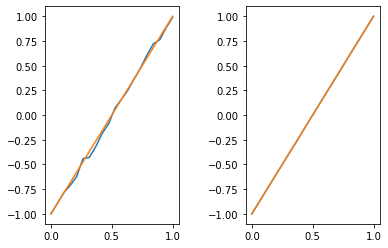

In [ ]:
f = plt.figure()
f.subplots_adjust(wspace = 0.5)
ax1 = f.add_subplot(1,2,1)
ax2 = f.add_subplot(1,2,2)

ax1.plot(beta, avg_mc_1, beta, avg_exact)
ax2.plot(beta, avg_mc_2, beta, avg_exact)

ax1.set_xlabel('Probability of landing on head')
ax1.set_ylabel('Average earnings per flip ($)')
ax1.set_title('Simulation for 1000 flips')

ax2.set_xlabel('Probability of landing on head')
ax2.set_ylabel('Average earnings per flip ($)')
ax1.set_title('Simulation for 10000 flips')
plt.show()

In [ ]:
def weighted_die(n):
  """ Does MCMC simulation for a weighted_die for n times and outputs the plot of average earning per roll vs number of rolls
  Args:
      n: An integer that sets the number of times the die is rolled
  
  Returns:
          earnings_array[-1]: A float that gives the average earning after n rolls
  """

  ratios = np.array([3, 3, 1, 1, 1, 1])
  earning_rule = np.array([1, 1, -1, -1, -1, -1])
  stepNum = int(n/20)
  earningAmt = 0
  earnings_array = np.zeros(stepNum)

  # initialize a state
  dieRoll = np.random.uniform(0, 1)
  for i in range(1,7):
    if dieRoll < (i/6):
      currentState = i
      break

  # MCMC steps
  for m in range(stepNum):
    # propose a new state
    for k in range(20):
      proposeRoll = np.random.uniform(0, 1)
      for l in range(1, 7):
        if proposeRoll < (l/6):
          proposeState = l
          break
      
      # decide to accept or not
      p_accept = min(1, ratios[proposeState - 1]/ratios[currentState - 1])
      if(np.random.uniform(0,1) < p_accept):
        currentState = proposeState

      earningAmt = earningAmt + earning_rule[currentState - 1]

    earnings_array[m] = earningAmt/((m+1)*20)
  
  plt.plot(np.linspace(1, n, stepNum), earnings_array)
  plt.xlabel('Number of rolls')
  plt.ylabel('Average earning per roll ($)')
  plt.show()

  return earnings_array[-1]

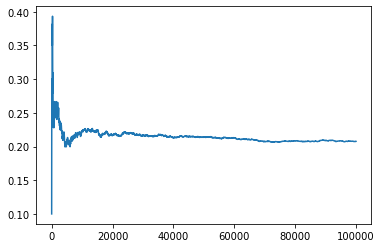

0.2077

In [ ]:
weighted_die(100000)

Seems like it starts to converge from roughly 20000 rolls.

# Some details on the classical 2D Ising model

The 2D Ising model is a simple model of a ferromagnetic material with a phase transition.
The model consists of a 2D lattice $L\times L$ of spins $s_i\in\{-1,+1\}$. Each spin interacts only with
its nearest neighbors.  When the lattice is finite The energy is expressed as

\begin{equation}
E(\{s_i\}) = - \sum_{\langle i,j\rangle}s_is_j - H\sum_i s_i,
\end{equation}

where $\{s_i\}$ is notation for the entire configuration of spins, $H$ is the 
external magnetic field, and $\langle i,j\rangle$ implies a summation over all 
nearest-neighbour pairs.  A nearest neighbor is a spin either directly to the right or left of a given spin, or directly above or below.
We have normalized energy with $J$, spin with $\hbar/2$, and magnetic field with $J/\mu$, where $J$ is the 
exchange energy and $\mu$ is the atomic magnetic moment.
When the system is in contact with a heat bath at temperature $T$ the equilibrium probability density is the 
Boltzmann distribution

\begin{equation}
    p(\{s_i\}) = Z^{-1}\exp\bigl(-E(\{s_i\})/T\bigr),
\end{equation}

where the partition function $Z$ is the sum of exponential factors $\exp(-E/T)$ over all possible configurations.
Below is the critical temperature

\begin{equation}
T_c = \frac{2}{\log(1+\sqrt 2)}\approx 2.2692
\end{equation}

In [ ]:
#Energy Function
def latticeEn(lattice, magField = 0):
  """ Computes the energy of the lattice

  Args:
      lattice: An ndarray representing the lattice construction.
      magField: A float representing the strength of the external magnetic field.
  
  Returns:
      enerbyState: A float. Gives the energy of the lattice.

  """
  L = len(lattice)
  neighborsum = 0

  for i in range(L):
    for j in range(L):
      neighborsum += -lattice[i][j] * (lattice[(i+1)%L][j] + lattice[i][(j-1)%L])
      
  fieldstrength = 0
  if magField != 0:
    fieldstrength = magField * np.sum(lattice)

  energyState = neighborsum - fieldstrength

  return energyState

##########################################################

def netMag(lattice):
  """ Computes the net magnetization S of the lattice

  Args:
      lattice: An nd-array with 1 and -1 as its elements representing the lattice configuration.
  
  Returns:
          netMagSum: A float. Gives the net magnetization S of the lattice.

  """
  netMagSum = np.sum(lattice)
  return netMagSum

###########################################################

def exp_updates(E, S, expE, expS, num_updates):
  """ Updates the expectation value of the observables
  
  Args:
      E: A float that takes the value of the original energy
      S: A float that takes the value of the original net magnetization
      expE: A float that takes the expectation value of the original energy
      expS: A float that takes the expectation value of the original net magnetization
      num_updates: A float that keeps track of the updated times
  
  Returns:
          E: A float that gives the value of the updated energy
          S: A float that gives the value of the updated net magnetization
          expE: A float that gives the expectation updated of the original energy
          expS: A float that gives the expectation updated of the original net magnetization
          
  """
  # Update expectation value of E
  E_exp = expE + (1/(num_updates)) * (E - expE)

  # Update expectation value of S
  S_exp = expS + (1/(num_updates)) * (S - expS)

  return E, S, E_exp, S_exp

###########################################################

def two_dim_ising(L, temp, num_steps, H =0):

  #Construct the LxL matrix
  isingLattice = np.random.choice([-1,1],(L,L))

  # Initial energy and net magnetization and their expectation values
  expectE_arr = np.zeros(num_steps)
  expectS_arr = np.zeros(num_steps)
  exp_Squared_E = np.zeros(num_steps)
  exp_Squared_S = np.zeros(num_steps)
  
  expectE_arr[0] = E = latticeEn(isingLattice)
  exp_Squared_E[0] = E ** 2
  expectS_arr[0] = S = netMag(isingLattice)
  exp_Squared_S[0] = S ** 2
 
  # MCMC
  for n in range(1, num_steps):
    i = np.random.randint(0, L)
    j = np.random.randint(0, L)
    proposed = -isingLattice[i][j]

    del_E = -2 * proposed * (isingLattice[(i-1)%L][j] + isingLattice[(i+1)%L][j] + isingLattice[i][(j-1)%L] + isingLattice[i][(j+1)%L] + H)
    # del_E = 2 * proposed * (isingLattice[(i-1)%L][j] + isingLattice[(i+1)%L][j] + isingLattice[i][(j-1)%L] + isingLattice[i][(j+1)%L] + H)
    prob_accept = np.exp(-del_E/temp)

    if del_E <= 0 or np.random.uniform(0,1) <= prob_accept:
      isingLattice[i][j] = proposed
      E, S, expectE_arr[n], expectS_arr[n] = exp_updates(E +del_E, S + (2*proposed), expectE_arr[n-1], expectS_arr[n-1], n)
    else:
      expectE_arr[n] = expectE_arr[n-1] + (1/n) * (E - expectE_arr[n-1])
      expectS_arr[n] = expectS_arr[n-1] + (1/n) *(S - expectS_arr[n-1])

  #return exp_Squared_E, exp_Squared_S, expectE_arr, expectS_arr
  return isingLattice, expectE_arr, expectS_arr

In [ ]:
# Plot U and M

# Simulate
temp = 1
L1 = 16
L2 = 32
N_1 = 1000000
N_2 = 4000000

isingLattice1, engArr1, spinArr1 = two_dim_ising(L1, temp, N_1)
isingLattice2, engArr2, spinArr2 = two_dim_ising(L2, temp, N_2)

# Plot
t1 = np.linspace(1,N_1,N_1)/L1**2
t2 = np.linspace(1,N_2,N_2)/L2**2
fig = plt.figure(figsize= (12, 6))
fig.suptitle("Plot of U and M for L = 16 and L = 32")
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t1, engArr1/L1**2, t2, engArr2/L2**2)
ax1.set_ylabel("Internal energy U") # is the unit correct?
ax1.set_xlabel("Updating step per stie")

ax2.plot(t1, np.abs(spinArr1/L1**2), t2, np.abs(spinArr2/L2**2))
ax2.set_ylabel("Total Magnetization M") # not sure about the unit
ax2.set_xlabel("Updating step per stie");

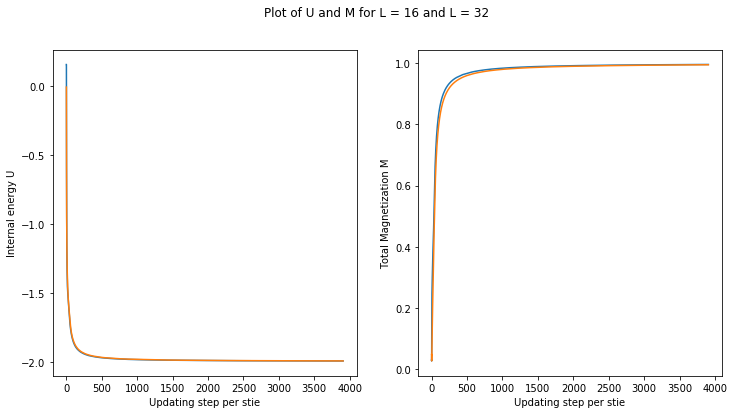

In [ ]:
plt.show()

In [ ]:
def two_dim_ising_ver2(isingLattice, L, temp, num_steps, H =0):
  """ Does 2D-ising model simulation through MCMC and computes the total magnetization after

  Args:
      isingLattice: An ndarray of the initial configuration of states.
      L: An integer specifying the size of the ising lattice.
      temp: A float representing the temperature.
      num_steps: An integer. Number of iterations.
      H: A float describing the external magentic field. Default 0.

  Returns:
          S: A float that gives the average total spin of the last 1000 states.
          isingLattice: An ndarray of the lattice configuration when the system is near equilibrium.

  """
  # MCMC
  for n in range(1, num_steps - 1000):
    i = np.random.randint(0, L)
    j = np.random.randint(0, L)
    propose = -isingLattice[i][j]

    del_E = -2 * propose * (isingLattice[(i-1)%L][j] + isingLattice[(i+1)%L][j] + isingLattice[i][(j-1)%L] + isingLattice[i][(j+1)%L] + H)
    prob_accept = np.exp(-del_E/temp)

    if del_E <= 0 or np.random.uniform(0,1) <= prob_accept:
      isingLattice[i][j] = propose

  S = Sn = np.sum(isingLattice)

  for m in range(1, 1000):
    i = np.random.randint(0, L)
    j = np.random.randint(0, L)
    propose = -isingLattice[i][j]

    del_E = -2 * propose * (isingLattice[(i-1)%L][j] + isingLattice[(i+1)%L][j] + isingLattice[i][(j-1)%L] + isingLattice[i][(j+1)%L] + H)
    prob_accept = np.exp(-del_E/temp)

    if del_E <= 0 or np.random.uniform(0,1) <= prob_accept:
      isingLattice[i][j] = propose
      Sn = Sn + 2 * propose

    S = S + (1/(m+1)) * (Sn - S)
    
  return S, isingLattice

In [ ]:
# simulation for system sizes L = 8, 16, 32, 64 for different temperatrues

T = np.linspace(6,0.5,100)
S_1 = np.zeros(len(T))
N_1 = np.linspace(100000, 50000, 100, dtype = int)

L_1 = 8

isingLattice_1 = np.random.choice([-1, 1], size=(L_1,L_1))
for i in range(len(T)):
  [S_1[i], isingLattice_1] = two_dim_ising_ver2(isingLattice_1,L_1,T[i],N_1[i])


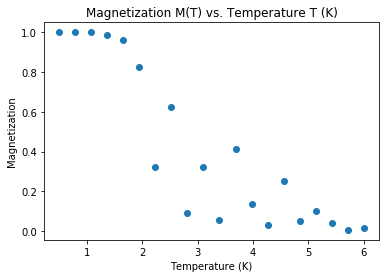

In [ ]:
plt.plot(T, np.abs(S_1)/(L_1**2),'o')
plt.title("Magnetization M(T) vs. Temperature T (K)")
plt.xlabel("Temperature (K)")
plt.ylabel("Magnetization")
plt.show()

In [ ]:
T = np.linspace(6,0.5,20)
S_2 = np.zeros(len(T))

L_2 = 16

N_2 = np.linspace(100000, 50000, 20, dtype = int)
isingLattice_2 = np.random.choice([-1,1], size=(L_2, L_2))

for i in range(len(T)):
  S_2[i], isingLattice_2 = two_dim_ising_ver2(isingLattice_2, L_2, T[i], N_2[i])

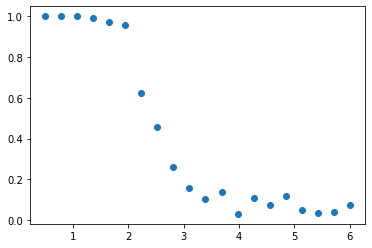

In [ ]:
plt.plot(T,np.abs(S_2)/(L_2**2),'o')

plt.show()

In [ ]:
T = np.linspace(6,0.5,20)
S_3 = np.zeros(len(T))

L_3 = 32

N_3 = np.linspace(100000, 50000, 20, dtype = int)
isingLattice_3 = np.random.choice([-1,1], size=(L_3, L_3))

for i in range(len(T)):
  S_3[i], isingLattice_3 = two_dim_ising_ver2(isingLattice_3, L_3, T[i], N_3[i])

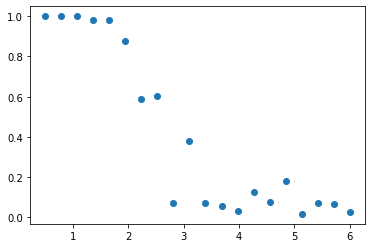

In [ ]:
plt.plot(T,np.abs(S_3)/(L_3**2),'o')
plt.show()

In [ ]:
T = np.linspace(6,0.5,20)
S_4 = np.zeros(len(T))

L_4 = 64

N_4 = np.linspace(500000, 300000, 20, dtype = int)
isingLattice_4 = np.random.choice([-1,1], size=(L_4, L_4))

for i in range(len(T)):
  S_4[i], isingLattice_4 = two_dim_ising_ver2(isingLattice_4, L_4, T[i], N_4[i])

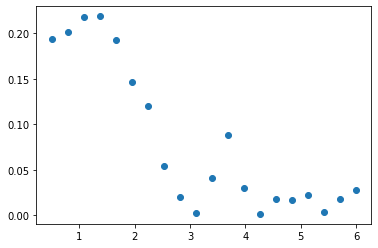

In [ ]:
plt.plot(T,np.abs(S_4)/(L_4**2),'o')
plt.show()

In [ ]:
 # simulation for system sizes L = 8, 16, 32, 64 for different temperatrues

# create arrays to store the simulation results
T = np.linspace(6,0.5,5)
S_1 = np.zeros(len(T))
S_2 = np.zeros(len(T))
S_3 = np.zeros(len(T))
S_4 = np.zeros(len(T))

L_1 = 8
L_2 = 16
L_3 = 32
L_4 = 64

N_1 = np.linspace(200000, 50000, 5, dtype = int)
N_2 = np.linspace(200000, 100000, 5, dtype = int)
N_3 = np.linspace(400000, 200000, 5, dtype = int)
N_4 = np.linspace(800000, 400000, 5, dtype = int)

# initial state
isingLattice_1 = np.random.choice([-1,1], size=(L_1, L_1))
isingLattice_2 = np.random.choice([-1,1], size=(L_2, L_2))
isingLattice_3 = np.random.choice([-1,1], size=(L_3, L_3))
isingLattice_4 = np.random.choice([-1,1], size=(L_4, L_4))

for i in range(len(T)):
  S_1[i], isingLattice_1 = two_dim_ising_ver2(isingLattice_1, L_1, T[i], N_1[i])
  S_2[i], isingLattice_2 = two_dim_ising_ver2(isingLattice_2, L_2, T[i], N_2[i])
  S_3[i], isingLattice_3 = two_dim_ising_ver2(isingLattice_3, L_3, T[i], N_3[i])
  S_4[i], isingLattice_4 = two_dim_ising_ver2(isingLattice_4, L_4, T[i], N_4[i])

KeyboardInterrupt: ignored

In [ ]:
# Calculate the theoretical value for the temperatures used in the previous simulation

M_theory = np.zeros(len(T))
Tc = 2.2692

for i in range(len(T)):
  if T[i] < Tc:
    M_theory[i] = (1 - (np.sinh(2/T[i])**(-4)))**0.125

In [ ]:
plt.plot(T,np.abs(S_1)/(L_1**2),'o')
plt.plot(T,np.abs(S_2)/(L_2**2),'o')
plt.plot(T,np.abs(S_3)/(L_3**2),'o')
plt.plot(T,np.abs(S_4)/(L_4**2),'o')
plt.plot(T,M_theory)

plt.xlabel("Temperature T (K)")
plt.ylabel("Magnetization M(T)")
plt.title("Magnetization M(T) vs. temperature T")
plt.show()

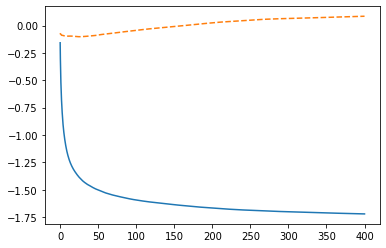

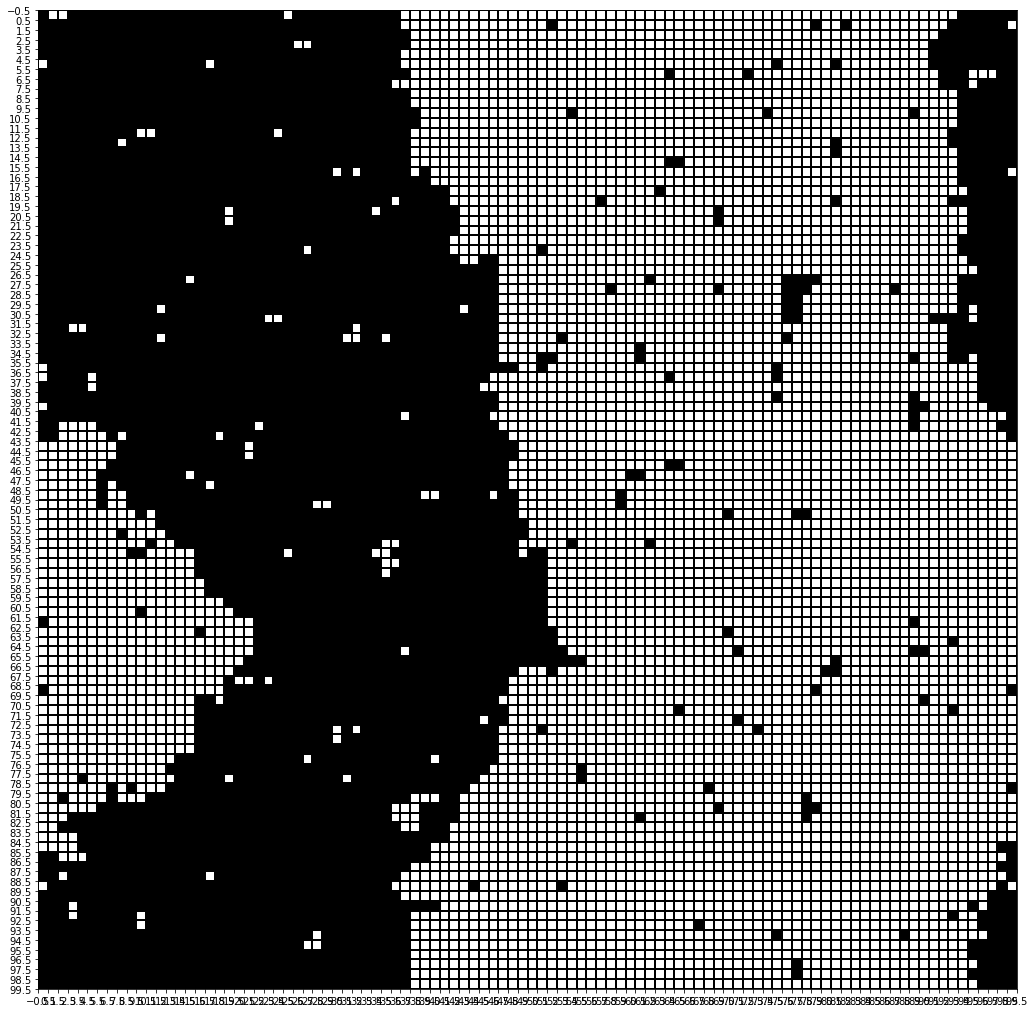

In [ ]:
#Spin Configurations at different temperatures
t = 400
L = 100

#dataEq, energy2_arr, mag2_arr, engArr, spinArr = two_dim_ising(L, 1.8, t*(L**2))
dataEq, engArr, spinArr = two_dim_ising(L, 1.8, t*(L**2))

# create discrete colormap
cmap = colors.ListedColormap(['white','black'])
bounds = [-1,1,0]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(26,18))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(dataEq, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-.5, 100, 20));
ax.set_yticks(np.arange(-.5, 100, 20));
plt.show()


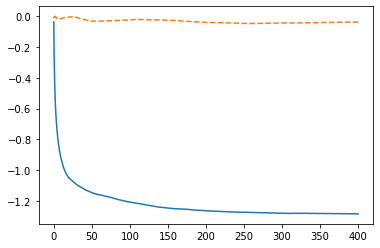

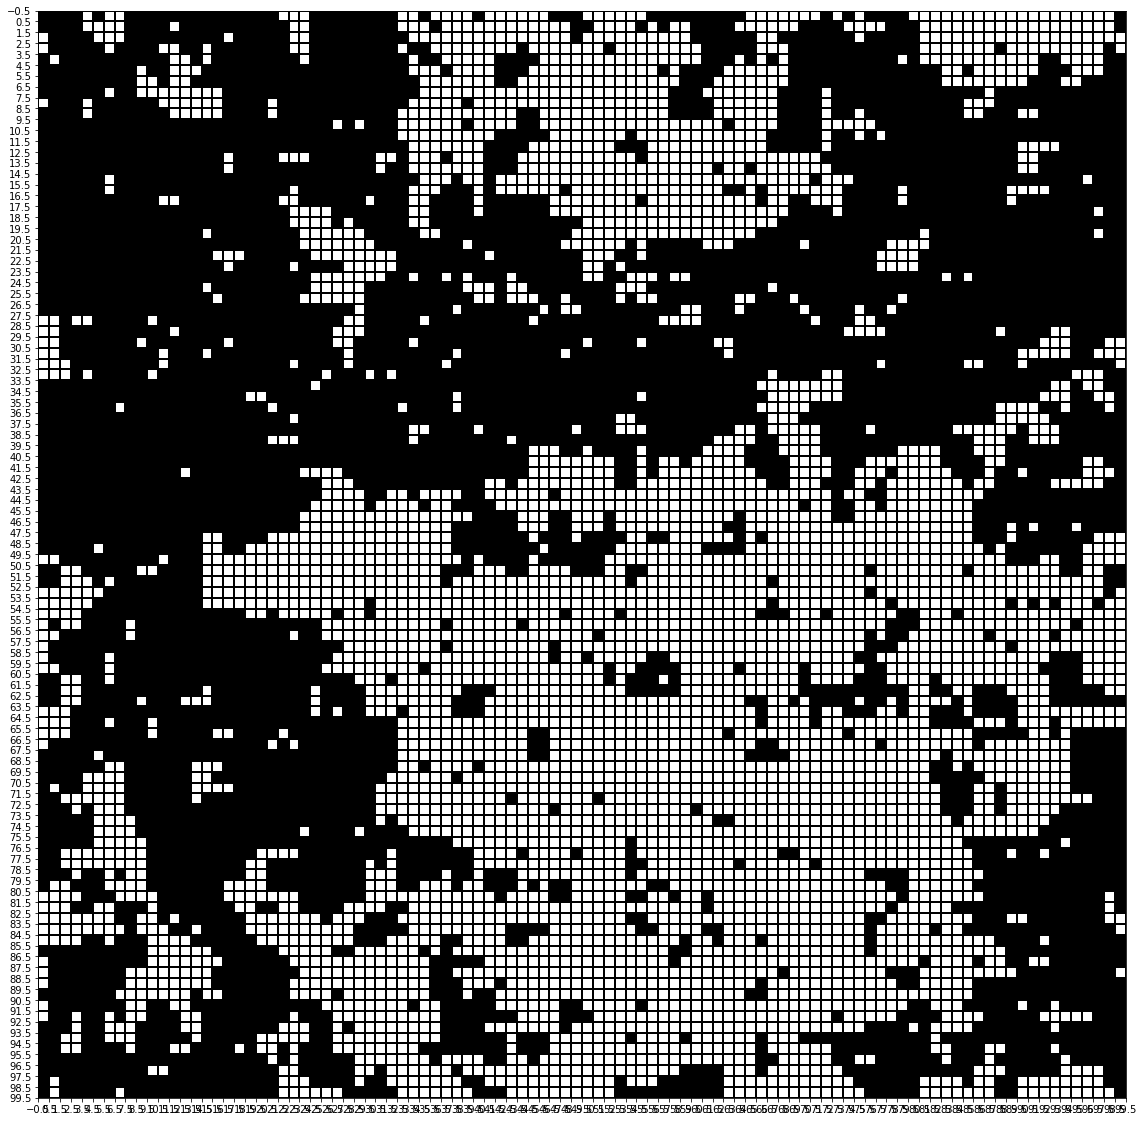

In [ ]:
#Spin Configurations at different temperatures
t = 400
L = 100
#dataEq, energy2_arr, mag2_arr, engArr, spinArr = two_dim_ising(L, 2.3, t*(L**2))
dataEq, engArr, spinArr = two_dim_ising(L, 2.3, t*(L**2))

# create discrete colormap
cmap = colors.ListedColormap(['white', 'black'])
bounds = [-1,1,0]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(dataEq, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-.5, 100, 20));
ax.set_yticks(np.arange(-.5, 100, 20));
plt.show()


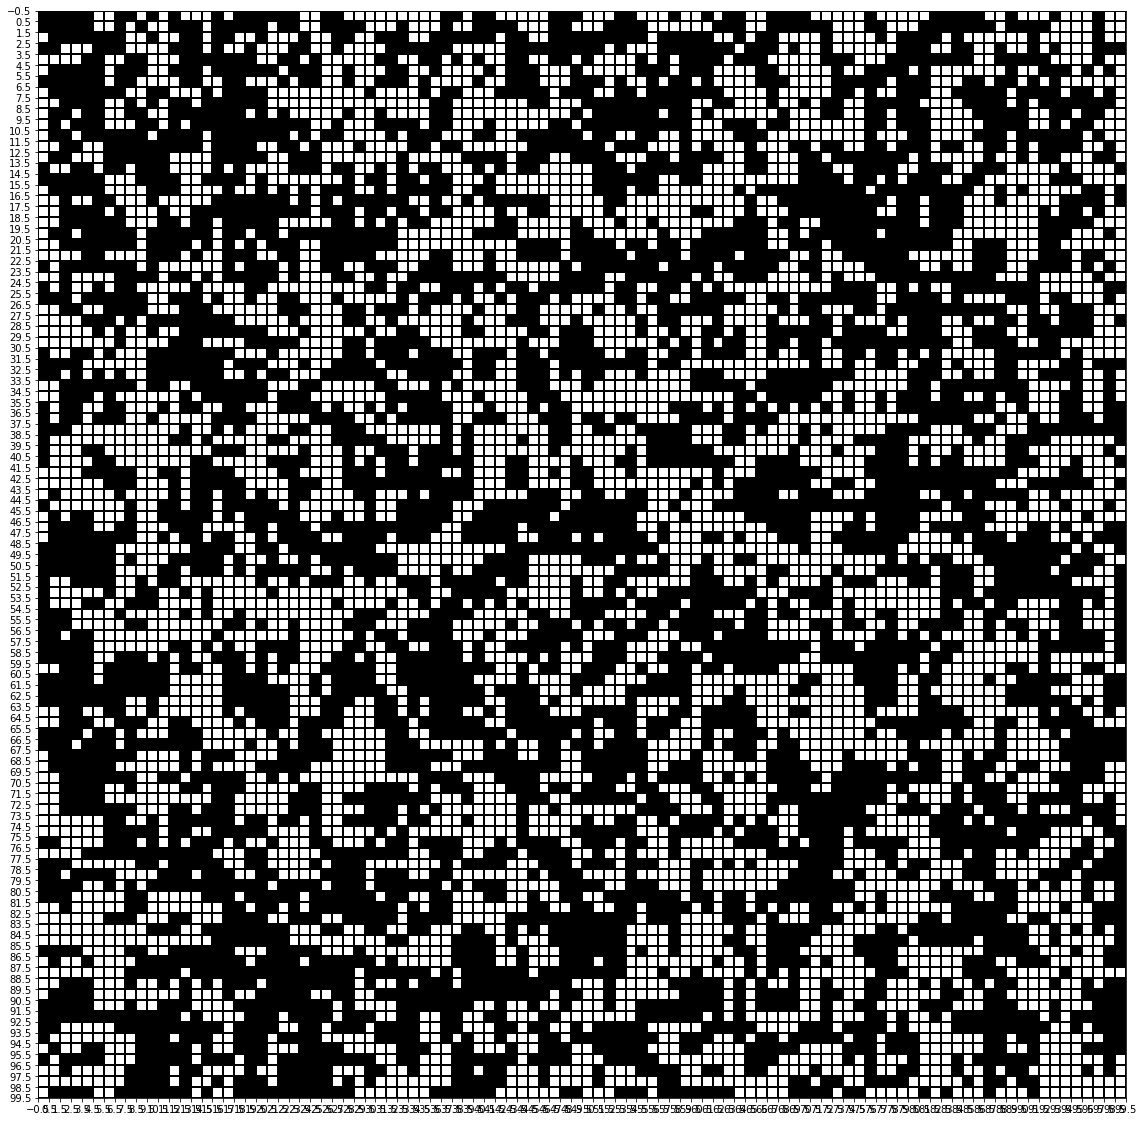

In [ ]:
#Spin Configurations at different temperatures
t = 150
L = 100
dataEq, engArr, spinArr = two_dim_ising(L, 4.0, t*(L**2))

# create discrete colormap
cmap = colors.ListedColormap(['white', 'black'])
bounds = [-1,1,0]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(dataEq, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-.5, 100, 20));
ax.set_yticks(np.arange(-.5, 100, 20));
plt.show()
